# Harden Stats
-load in a flat file of James Harden for 2018-19 the data types and calculate basic stats.


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('./game_logs')


In [3]:
os.listdir(os.getcwd())

['Harden_Stats.csv', '2018_19_Harden_James.csv']

In [4]:
df = pd.read_csv('2018_19_Harden_James.csv')
df.head(3)

,game_season,date_game,age,team_id,game_location,opp_id,game_result,gs,mp,fg,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus
0,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1.0,34:43,6.0,...,7.0,9.0,10.0,3.0,1.0,4.0,2.0,18.0,18.9,-23.0
1,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1.0,37:50,10.0,...,6.0,7.0,5.0,2.0,1.0,6.0,2.0,36.0,27.0,-3.0
2,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1.0,39:45,11.0,...,4.0,4.0,14.0,2.0,0.0,3.0,1.0,31.0,26.4,5.0


In [5]:
df.dtypes

game_season      float64
date_game         object
age               object
team_id           object
game_location     object
opp_id            object
game_result       object
gs               float64
mp                object
fg               float64
fga              float64
fg_pct           float64
fg3              float64
fg3a             float64
fg3_pct          float64
ft               float64
fta              float64
ft_pct           float64
orb              float64
drb              float64
trb              float64
ast              float64
stl              float64
blk              float64
tov              float64
pf               float64
pts              float64
game_score       float64
plus_minus       float64
dtype: object

In [6]:
df[df.game_season != '']['pts'].mean().round(1)

36.1

In [7]:
def str_min_to_float(x):
        if pd.isna(x) ==True:
            return 0 
        else:
            mins = int(x.split(':')[0])
            secs = int(x.split(':')[1])/60.0
            val = mins + secs
            return round(val,1)
df['mp'] = df['mp'].apply(str_min_to_float)
df.head(2)

,game_season,date_game,age,team_id,game_location,opp_id,game_result,gs,mp,fg,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus
0,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1.0,34.7,6.0,...,7.0,9.0,10.0,3.0,1.0,4.0,2.0,18.0,18.9,-23.0
1,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1.0,37.8,10.0,...,6.0,7.0,5.0,2.0,1.0,6.0,2.0,36.0,27.0,-3.0


In [8]:
df['g'] = [1 if pd.isna(df.game_season[gm])==False else 0 
for gm in range(len(df))]
df.g.sum()


78

In [9]:
df['home_game'] = [1 if pd.isna(df.game_location[gm]) ==True else 0 for gm in range(len(df))]
df.drop(['game_location'], inplace= True, axis=1)

In [10]:
df['win'] = [1 if df['game_result'][gm][:1] == 'W' else 0 for gm in range(len(df))]
sum(df.win)

53

In [11]:
def stat_per_time(stat, minutes, per= 36):
    if minutes == 0:
        return 0
    else:
        val_min = stat/minutes
        return round(val_min * per,1)

In [12]:
df['pts_per_36'] = df.apply(lambda row: stat_per_time(stat = row['pts'], minutes = row['mp']), axis=1)

In [13]:
df['trb_per_36'] = df.apply(lambda row: stat_per_time(stat = row['trb'], minutes = row['mp']), axis=1)

In [14]:
df['tov_per_12'] = df.apply(lambda row: stat_per_time(stat = row['tov'], minutes = row['mp'], per= 12), axis=1)

In [15]:
df[(df.date_game=='2018-11-23')| (df.date_game =='2018-11-30')][['opp_id', 'pts', 'pts_per_36']]

,opp_id,pts,pts_per_36
16,DET,33.0,29.0
20,SAS,23.0,30.0


In [16]:
df.to_csv('Harden_Stats.csv', index=False)

In [17]:
df.groupby(['win'])['pts'].mean().round(1)

win
0    34.4
1    37.0
Name: pts, dtype: float64

In [18]:
df.groupby(['home_game','win'])['pts'].mean().round(1)

home_game  win
0          0      34.2
           1      34.4
1          0      35.0
           1      38.7
Name: pts, dtype: float64

In [19]:
df.groupby(['home_game', 'win'])['pts'].agg(games = 'count' , avg_pts='mean')

games    avg_pts
home_game win                  
0         0       19  34.210526
          1       20  34.400000
1         0        8  35.000000
          1       31  38.709677

<AxesSubplot:xlabel='home_game', ylabel='pts'>

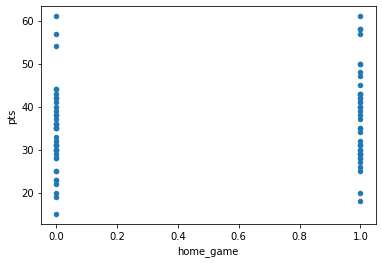

In [20]:
df[['home_game', 'pts']].plot(kind='scatter' , x = 'home_game', y ='pts')

<AxesSubplot:xlabel='home_game', ylabel='pts'>

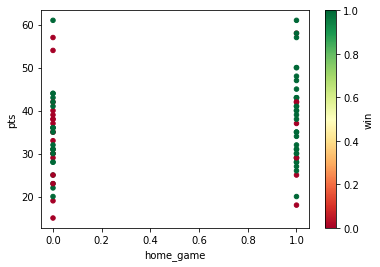

In [21]:
df[['home_game', 'pts', 'win']].plot(kind='scatter',
                                    x = 'home_game',
                                    y = 'pts',
                                    c = 'win',
                                    cmap = 'RdYlGn',
                                    sharex=False)

In [22]:
hpts=df[df.win==1].groupby(['home_game'])['pts'].mean()
apts= df[df.win==0].groupby(['home_game'])['pts'].mean()
pd.DataFrame({'home':hpts, 'away':apts})

,home,away
home_game,,
0,34.400000,34.210526
1,38.709677,35.000000


In [23]:
df.pivot_table(index= 'home_game', columns= 'win', values= 'pts', aggfunc=np.mean)

win,0,1
home_game,,
0,34.210526,34.400000
1,35.000000,38.709677


<AxesSubplot:xlabel='home_game'>

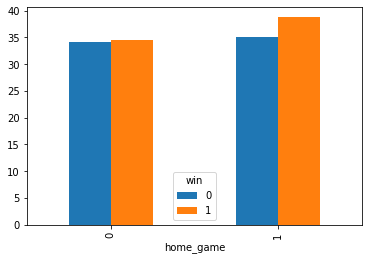

In [24]:
df.pivot_table(index= 'home_game', columns= 'win', values= 'pts', aggfunc=np.mean).plot(kind='bar')